<a href="https://colab.research.google.com/github/habiib1999/pattern-recognition-Kmeans-Normalized-cut-example/blob/main/Q1_Kmeans_Implement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

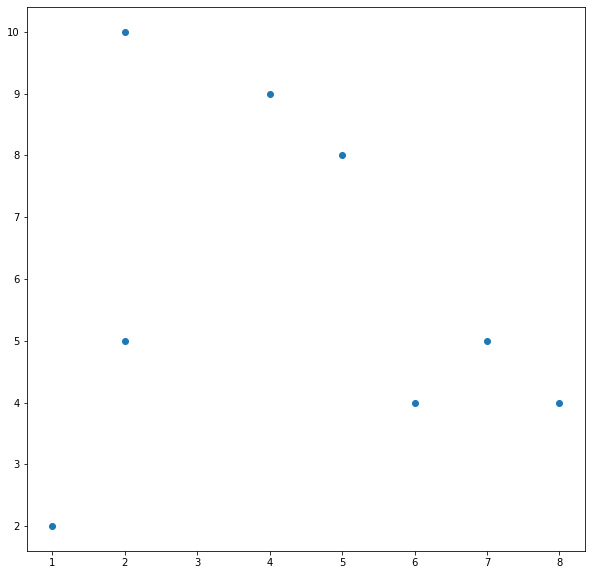

old centroids  =  [[2 10]
 [5 8]
 [1 2]]
new centroids  =  [[2.0 10.0]
 [6.0 6.0]
 [1.5 3.5]]


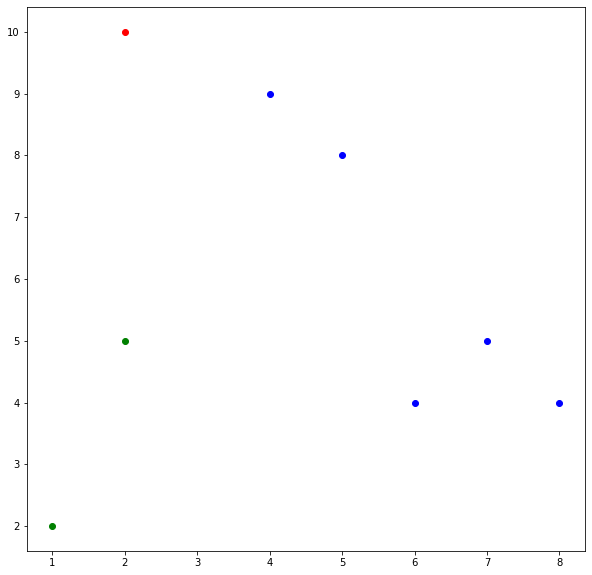

old centroids  =  [[2.0 10.0]
 [6.0 6.0]
 [1.5 3.5]]
new centroids  =  [[3.0 9.5]
 [6.5 5.25]
 [1.5 3.5]]


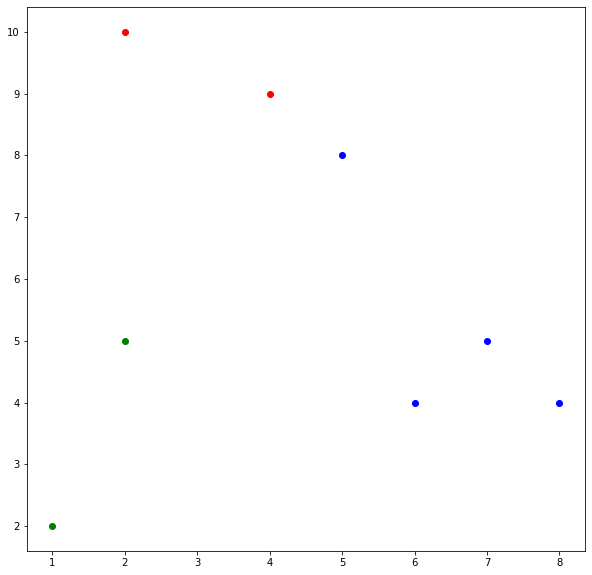

old centroids  =  [[3.0 9.5]
 [6.5 5.25]
 [1.5 3.5]]
new centroids  =  [[3.6666666666666665 9.0]
 [7.0 4.333333333333333]
 [1.5 3.5]]


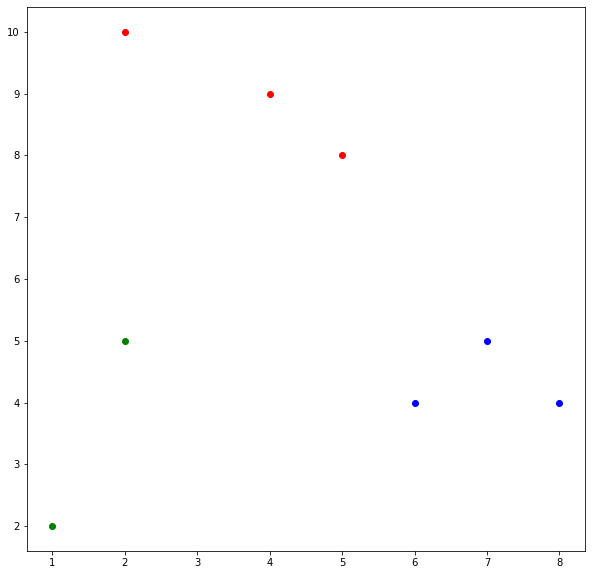

old centroids  =  [[3.6666666666666665 9.0]
 [7.0 4.333333333333333]
 [1.5 3.5]]
new centroids  =  [[3.6666666666666665 9.0]
 [7.0 4.333333333333333]
 [1.5 3.5]]


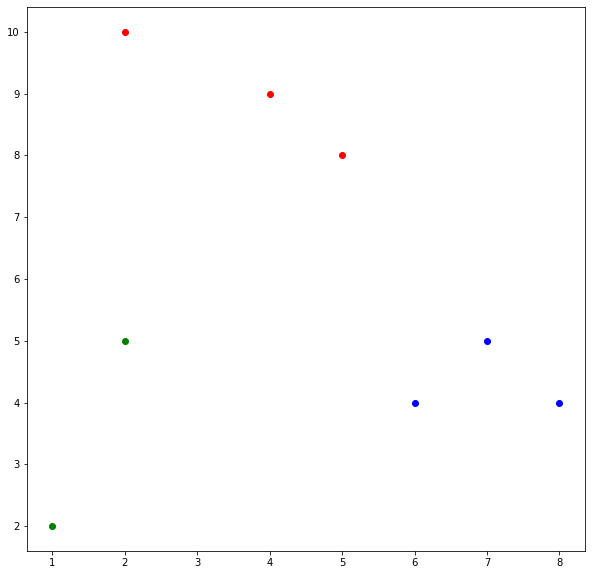

In [22]:
import math; #For pow and sqrt
import sys;
from random import shuffle, uniform;
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import itertools


def FindNearshCentroid(means,item):
    
    minimum = sys.maxsize
    index = -1;

    for i in range(len(means)):
        #Ecludean distance
        dis = np.linalg.norm(item-means[i])

        if(dis < minimum):
            minimum = dis;
            index = i;
    
    return index;


def UpdateCentroids(clusters_data, items, centroids):

    for i in range( len(clusters_data) ):
        new_centroid_sum_x = 0
        new_centroid_sum_y = 0
        for j in range( len(clusters_data[i]) ):
            index = clusters_data[i][j]
            new_centroid_sum_x += items[index][0]
            new_centroid_sum_y += items[index][1]
        centroids[i][0] = new_centroid_sum_x/float(j+1)
        centroids[i][1] = new_centroid_sum_y/float(j+1)
    return centroids



def groupToCentroid(centroids,items):
    clusters_size = [0 for i in range(len(centroids))]
    clusters_data = [[] for i in range(len(centroids))]; #Init clusters
    for i in range(len(items)):
        item = items[i];           
        centroid_index = FindNearshCentroid(centroids,item);
        clusters_size[centroid_index] += 1;
        clusters_data[centroid_index].append(i)
    return clusters_data, clusters_size


def KMeans(k,items,centroids):

    iterations = 0
    converge_counter = 0
    old_centroids = [[] for i in range(len(centroids))]; 
    old_centroids = np.array(old_centroids)
    while np.array_equal(old_centroids, centroids) != True :
      
      converge_counter = converge_counter + 1
      clusters_data , clusters_size = groupToCentroid(centroids, items)
      old_centroids = np.copy(centroids)
      centroids = UpdateCentroids(clusters_data, items, centroids) 
      print("old centroids  = ", old_centroids)
      print("new centroids  = ", centroids)


      colors = itertools.cycle(["r", "b", "g"])
      fig = plt.figure(figsize=(10, 10))
      for i in range(len(clusters_data)):

        item_index_array = clusters_data[i]
        point_color = next(colors)
        for j in item_index_array:
          
          plt.scatter(items[j][0], items[j][1], color = point_color)
          
      plt.show()
    


###_Main_###
def main():
    items = np.array( [ [ 2, 10],
                  [ 2, 5],
                  [ 8, 4],
                  [ 5, 8],
                  [ 7, 5],
                  [ 6, 4],
                  [ 1, 2],
                  [ 4, 9] ] ,dtype = object)
    print('origional points')
    fig = plt.figure(figsize=(10, 10))
    plt.scatter(items[:, 0], items[:, 1])
    plt.show()

    centroids = np.array( [ items[0],
                            items[3],
                            items[6] ] ,dtype = object)
    
    k = 3
    KMeans(k,items, centroids)



if __name__ == "__main__":
    main();